# Imports

In [1]:
import numpy as np
from scipy import stats
from scipy import ndimage


%matplotlib inline
import matplotlib as mpl
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns_colors = sns.color_palette(None, 8)
sns_colors2 = sns.color_palette("Blues")
# sns_colors = sns.color_palette("hls", 8)
sns_colors = ['#1075a1','#24b476','#e94d5b','#7D48DA','#faa44f','#1fb0e7','#64E717']

# rc('text', usetex=True)
# plt.rc('font', family='serif')
# import matplotlib as mpl
rc('font', family='serif')
# rc('font', serif='Times')
# rc('font', serif='CMU Serif')

/Users/iassael/anaconda/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
def mean_confidence_interval(data, confidence=0.95):
    a = np.array(data)
    n = a.shape[0]
    m, se = a.mean(1), stats.sem(a,1)
    h = se * stats.t._ppf((1+confidence)/2., n-1)
    return m, h

# DQN vs Naive vs Handcoded

In [51]:
rows = 50
s_3_3_shared_feed = np.zeros((rows, 10))
s_3_3_shared_feed_opt = np.zeros((rows, 10))

data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_123.csv', skiprows=1, delimiter=',')
x_axis = data[:rows,0]
s_3_3_shared_feed[:,0] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_opt[:,0] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_137.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,1] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_opt[:,1] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_138.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,2] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_opt[:,2] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_225.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,3] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_opt[:,3] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_267.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,4] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_opt[:,4] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_318.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,5] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_opt[:,5] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_337.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,6] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_opt[:,6] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_474.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,7] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_opt[:,7] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_966.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,8] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_opt[:,8] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_1486.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,9] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_opt[:,9] = data[:rows,7] / data[:rows,8]


# s_3_3_shared_nofeed = np.zeros((rows, 2))
# data = np.loadtxt('s_3_3/switch_128_3_3_feed_271.csv', skiprows=1, delimiter=',')
# s_3_3_shared_nofeed[:,0] = data[:rows,5] / data[:rows,8]
# data = np.loadtxt('s_3_3/switch_128_3_3_feed_123.csv', skiprows=1, delimiter=',')
# s_3_3_shared_nofeed[:,1] = data[:rows,5] / data[:rows,8]


# s_3_3_shared_nofeed = np.zeros((rows, 4))
# data = np.loadtxt('s_3_3/switch_128_3_3_shared_123.csv', skiprows=1, delimiter=',')
# s_3_3_shared_nofeed[:,0] = data[:rows,5] / data[:rows,8]
# data = np.loadtxt('s_3_3/switch_128_3_3_shared_130.csv', skiprows=1, delimiter=',')
# s_3_3_shared_nofeed[:,1] = data[:rows,5] / data[:rows,8]
# data = np.loadtxt('s_3_3/switch_128_3_3_shared_928.csv', skiprows=1, delimiter=',')
# s_3_3_shared_nofeed[:,2] = data[:rows,5] / data[:rows,8]
# data = np.loadtxt('s_3_3/switch_128_3_3_shared_996.csv', skiprows=1, delimiter=',')
# s_3_3_shared_nofeed[:,3] = data[:rows,5] / data[:rows,8]


s_3_3_noshared_nofeed_er = np.zeros((rows, 8))
data = np.loadtxt('s_3_3/switch_128_3_3_er_154.csv', skiprows=1, delimiter=',')
s_3_3_noshared_nofeed_er[:,0] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_er_184.csv', skiprows=1, delimiter=',')
s_3_3_noshared_nofeed_er[:,1] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_er_236.csv', skiprows=1, delimiter=',')
s_3_3_noshared_nofeed_er[:,2] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_er_332.csv', skiprows=1, delimiter=',')
s_3_3_noshared_nofeed_er[:,3] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_er_731.csv', skiprows=1, delimiter=',')
s_3_3_noshared_nofeed_er[:,4] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_er_985.csv', skiprows=1, delimiter=',')
s_3_3_noshared_nofeed_er[:,5] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_er_987.csv', skiprows=1, delimiter=',')
s_3_3_noshared_nofeed_er[:,6] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_er_3242.csv', skiprows=1, delimiter=',')
s_3_3_noshared_nofeed_er[:,7] = data[:rows,5] / data[:rows,8]

### Plot results

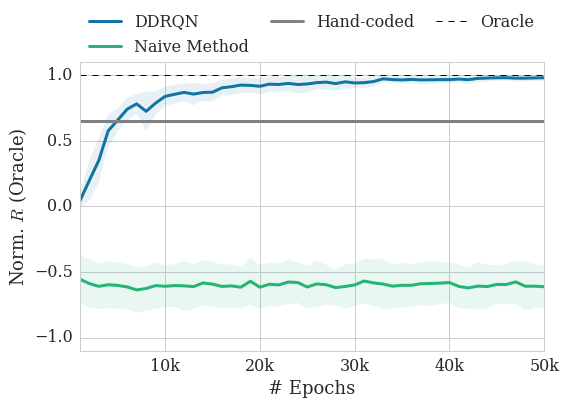

In [52]:
plt.close('all')
fig, ax = plt.subplots(figsize=(8,5))
# plt.title(r'Reward vs Information Entropy', fontsize=18)

s_3_3_shared_feed_m, s_3_3_shared_feed_c = mean_confidence_interval(s_3_3_shared_feed)
plt.plot(x_axis, s_3_3_shared_feed_m, color=sns_colors[0], linestyle='-', linewidth=3, label="DDRQN")
plt.fill_between(x_axis, s_3_3_shared_feed_m - s_3_3_shared_feed_c, s_3_3_shared_feed_m + s_3_3_shared_feed_c, facecolor=sns_colors[0], edgecolor="none", alpha=0.1)


s_3_3_noshared_nofeed_er_m, s_3_3_noshared_nofeed_er_c = mean_confidence_interval(s_3_3_noshared_nofeed_er)
plt.plot(x_axis, s_3_3_noshared_nofeed_er_m, color=sns_colors[1], linestyle='-', linewidth=3, label="Naive Method")
plt.fill_between(x_axis, s_3_3_noshared_nofeed_er_m - s_3_3_noshared_nofeed_er_c, s_3_3_noshared_nofeed_er_m + s_3_3_noshared_nofeed_er_c, facecolor=sns_colors[1], edgecolor="none", alpha=0.1)

# s_3_3_shared_feed_opt_m, s_3_3_shared_feed_opt_c = mean_confidence_interval(s_3_3_shared_feed_opt)
plt.plot(x_axis, np.ones(rows)*np.nanmean(s_3_3_shared_feed_opt), color='grey', linestyle='-', linewidth=3, label="Hand-coded")
# plt.fill_between(x_axis, s_3_3_shared_feed_opt_m - s_3_3_shared_feed_opt_c, s_3_3_shared_feed_opt_m + s_3_3_shared_feed_opt_c, facecolor='grey', edgecolor="none", alpha=0.1)

plt.plot(x_axis, np.ones(rows), color='black', linestyle='--', linewidth=1, label="Oracle")



plt.ylabel(r'Norm. $R$ (Oracle)', fontsize=18)
plt.xlabel(r'# Epochs', fontsize=18)
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: str(int(x/1000.))+'k' if x > 0 else '')) #format(int(x), ',')))
plt.xlim(x_axis[0], x_axis[-1])
plt.ylim(-1.1, 1.1)
# plt.legend(borderaxespad=0.2, fontsize=18, loc=4)
plt.legend(borderaxespad=0.2, bbox_to_anchor=(0., 1.1, 1., .102), fontsize=16, ncol=3, mode="expand")
# plt.legend(borderaxespad=0.2, fontsize=18, loc=4, bbox_to_anchor=(0., 0.3, 1.42, 0))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.tight_layout()
plt.savefig('s_3_3_vs.pdf', bbox_inches='tight', dpi=200)

# Contibutions

In [48]:
rows = 50
s_3_3_shared_feed = np.zeros((rows, 10))
s_3_3_shared_feed_opt = np.zeros((rows, 10))

data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_123.csv', skiprows=1, delimiter=',')
x_axis = data[:rows,0]
s_3_3_shared_feed[:,0] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_opt[:,0] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_137.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,1] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_opt[:,1] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_138.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,2] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_opt[:,2] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_225.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,3] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_opt[:,3] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_267.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,4] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_opt[:,4] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_318.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,5] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_opt[:,5] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_337.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,6] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_opt[:,6] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_474.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,7] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_opt[:,7] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_966.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,8] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_opt[:,8] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_1486.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,9] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_opt[:,9] = data[:rows,7] / data[:rows,8]



s_3_3_noshared_feed = np.zeros((rows, 10))
data = np.loadtxt('s_3_3/switch_128_3_3_feed_123.csv', skiprows=1, delimiter=',')
s_3_3_noshared_feed[:,0] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_feed_271.csv', skiprows=1, delimiter=',')
s_3_3_noshared_feed[:,1] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_feed_430.csv', skiprows=1, delimiter=',')
s_3_3_noshared_feed[:,2] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_feed_885.csv', skiprows=1, delimiter=',')
s_3_3_noshared_feed[:,3] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_feed_932.csv', skiprows=1, delimiter=',')
s_3_3_noshared_feed[:,4] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_feed_7030.csv', skiprows=1, delimiter=',')
s_3_3_noshared_feed[:,5] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_feed_9567.csv', skiprows=1, delimiter=',')
s_3_3_noshared_feed[:,6] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_feed_9914.csv', skiprows=1, delimiter=',')
s_3_3_noshared_feed[:,7] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_feed_8135.csv', skiprows=1, delimiter=',')
s_3_3_noshared_feed[:,8] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_feed_8906.csv', skiprows=1, delimiter=',')
s_3_3_noshared_feed[:,9] = data[:rows,5] / data[:rows,8]


s_3_3_shared_nofeed = np.zeros((rows, 10))
data = np.loadtxt('s_3_3/switch_128_3_3_shared_25.csv', skiprows=1, delimiter=',')
s_3_3_shared_nofeed[:,0] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_130.csv', skiprows=1, delimiter=',')
s_3_3_shared_nofeed[:,1] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_331.csv', skiprows=1, delimiter=',')
s_3_3_shared_nofeed[:,2] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_928.csv', skiprows=1, delimiter=',')
s_3_3_shared_nofeed[:,3] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_996.csv', skiprows=1, delimiter=',')
s_3_3_shared_nofeed[:,4] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_2224.csv', skiprows=1, delimiter=',')
s_3_3_shared_nofeed[:,5] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_2292.csv', skiprows=1, delimiter=',')
s_3_3_shared_nofeed[:,6] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_2747.csv', skiprows=1, delimiter=',')
s_3_3_shared_nofeed[:,7] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_3189.csv', skiprows=1, delimiter=',')
s_3_3_shared_nofeed[:,8] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_4142.csv', skiprows=1, delimiter=',')
s_3_3_shared_nofeed[:,9] = data[:rows,5] / data[:rows,8]

s_3_3_er = np.zeros((rows, 10))
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_er_123.csv', skiprows=1, delimiter=',')
s_3_3_er[:,0] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_er_165.csv', skiprows=1, delimiter=',')
s_3_3_er[:,1] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_er_220.csv', skiprows=1, delimiter=',')
s_3_3_er[:,2] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_er_614.csv', skiprows=1, delimiter=',')
s_3_3_er[:,3] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_er_849.csv', skiprows=1, delimiter=',')
s_3_3_er[:,4] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_er_966.csv', skiprows=1, delimiter=',')
s_3_3_er[:,5] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_er_7206.csv', skiprows=1, delimiter=',')
s_3_3_er[:,6] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_er_7859.csv', skiprows=1, delimiter=',')
s_3_3_er[:,7] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_er_8763.csv', skiprows=1, delimiter=',')
s_3_3_er[:,8] = data[:rows,5] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_er_47.csv', skiprows=1, delimiter=',')
s_3_3_er[:,9] = data[:rows,5] / data[:rows,8]

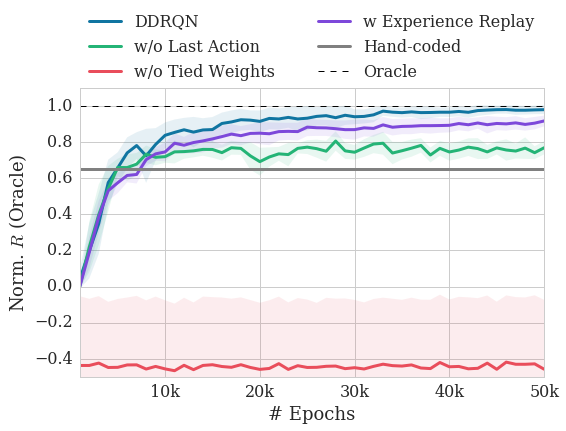

In [49]:
plt.close('all')
fig, ax = plt.subplots(figsize=(8,5))
# plt.title(r'Reward vs Information Entropy', fontsize=18)

s_3_3_shared_feed_m, s_3_3_shared_feed_c = mean_confidence_interval(s_3_3_shared_feed)
plt.plot(x_axis, s_3_3_shared_feed_m, color=sns_colors[0], linestyle='-', linewidth=3, label="DDRQN")
plt.fill_between(x_axis, s_3_3_shared_feed_m - s_3_3_shared_feed_c, s_3_3_shared_feed_m + s_3_3_shared_feed_c, facecolor=sns_colors[0], edgecolor="none", alpha=0.1)


s_3_3_shared_nofeed_m, s_3_3_shared_nofeed_c = mean_confidence_interval(s_3_3_shared_nofeed)
plt.plot(x_axis, s_3_3_shared_nofeed_m, color=sns_colors[1], linestyle='-', linewidth=3, label="w/o Last Action")
plt.fill_between(x_axis, s_3_3_shared_nofeed_m - s_3_3_shared_nofeed_c, s_3_3_shared_nofeed_m + s_3_3_shared_nofeed_c, facecolor=sns_colors[1], edgecolor="none", alpha=0.1)


s_3_3_noshared_feed_m, s_3_3_noshared_feed_c = mean_confidence_interval(s_3_3_noshared_feed)
plt.plot(x_axis, s_3_3_noshared_feed_m, color=sns_colors[2], linestyle='-', linewidth=3, label="w/o Tied Weights")
plt.fill_between(x_axis, s_3_3_noshared_feed_m - s_3_3_noshared_feed_c, s_3_3_noshared_feed_m + s_3_3_noshared_feed_c, facecolor=sns_colors[2], edgecolor="none", alpha=0.1)


s_3_3_er_m, s_3_3_er_c = mean_confidence_interval(s_3_3_er)
plt.plot(x_axis, s_3_3_er_m, color=sns_colors[3], linestyle='-', linewidth=3, label="w Experience Replay")
plt.fill_between(x_axis, s_3_3_er_m - s_3_3_er_c, s_3_3_er_m + s_3_3_er_c, facecolor=sns_colors[3], edgecolor="none", alpha=0.1)


# s_3_3_shared_feed_opt_m, s_3_3_shared_feed_opt_c = mean_confidence_interval(s_3_3_shared_feed_opt)
plt.plot(x_axis, np.ones(rows)*np.nanmean(s_3_3_shared_feed_opt), color='grey', linestyle='-', linewidth=3, label="Hand-coded")
# plt.fill_between(x_axis, s_3_3_shared_feed_opt_m - s_3_3_shared_feed_opt_c, s_3_3_shared_feed_opt_m + s_3_3_shared_feed_opt_c, facecolor='grey', edgecolor="none", alpha=0.1)

plt.plot(x_axis, np.ones(rows), color='black', linestyle='--', linewidth=1, label="Oracle")


plt.ylabel(r'Norm. $R$ (Oracle)', fontsize=18)
plt.xlabel(r'# Epochs', fontsize=18)
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: str(int(x/1000.))+'k' if x > 0 else '')) #format(int(x), ',')))
plt.xlim(x_axis[0], x_axis[-1])
plt.ylim(-0.5, 1.1)
plt.legend(borderaxespad=0.2, bbox_to_anchor=(0., 1.19, 1., .102), fontsize=16, ncol=2, mode="expand")
# plt.legend(borderaxespad=0.2, bbox_to_anchor=(0., 1.1, 1., .102), fontsize=16, ncol=2, mode="expand")
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.tight_layout()
plt.savefig('s_3_3_contributions.pdf', bbox_inches='tight', dpi=200)

# No swithches

In [46]:
rows = 50
s_3_3_shared_feed = np.zeros((rows, 10))
s_3_3_shared_feed_no = np.zeros((rows, 10))
s_3_3_shared_feed_opt = np.zeros((rows, 10))

data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_123.csv', skiprows=1, delimiter=',')
x_axis = data[:rows,0]
s_3_3_shared_feed[:,0] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_no[:,0] = data[:rows,6] / data[:rows,8]
s_3_3_shared_feed_opt[:,0] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_137.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,1] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_no[:,1] = data[:rows,6] / data[:rows,8]
s_3_3_shared_feed_opt[:,1] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_138.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,2] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_no[:,2] = data[:rows,6] / data[:rows,8]
s_3_3_shared_feed_opt[:,2] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_225.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,3] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_no[:,3] = data[:rows,6] / data[:rows,8]
s_3_3_shared_feed_opt[:,3] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_267.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,4] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_no[:,4] = data[:rows,6] / data[:rows,8]
s_3_3_shared_feed_opt[:,4] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_318.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,5] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_no[:,5] = data[:rows,6] / data[:rows,8]
s_3_3_shared_feed_opt[:,5] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_337.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,6] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_no[:,6] = data[:rows,6] / data[:rows,8]
s_3_3_shared_feed_opt[:,6] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_474.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,7] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_no[:,7] = data[:rows,6] / data[:rows,8]
s_3_3_shared_feed_opt[:,7] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_966.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,8] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_no[:,8] = data[:rows,6] / data[:rows,8]
s_3_3_shared_feed_opt[:,8] = data[:rows,7] / data[:rows,8]
data = np.loadtxt('s_3_3/switch_128_3_3_shared_feed_1486.csv', skiprows=1, delimiter=',')
s_3_3_shared_feed[:,9] = data[:rows,5] / data[:rows,8]
s_3_3_shared_feed_no[:,9] = data[:rows,6] / data[:rows,8]
s_3_3_shared_feed_opt[:,9] = data[:rows,7] / data[:rows,8]

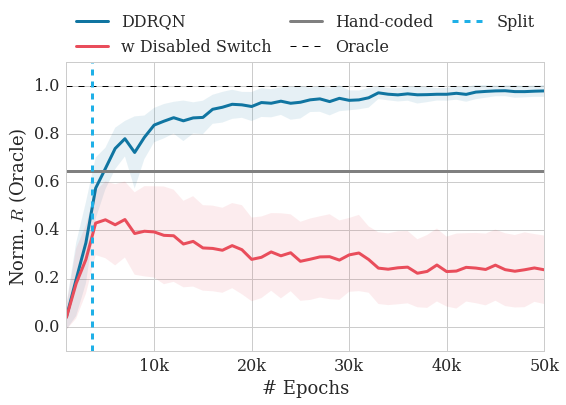

In [47]:
plt.close('all')
fig, ax = plt.subplots(figsize=(8,5))
# plt.title(r'Reward vs Information Entropy', fontsize=18)

# plt.scatter([3600], [0.43], color=sns_colors[3], s=1000, edgecolors='black', alpha=0.5)

s_3_3_shared_feed_m, s_3_3_shared_feed_c = mean_confidence_interval(s_3_3_shared_feed)
plt.plot(x_axis, s_3_3_shared_feed_m, color=sns_colors[0], linestyle='-', linewidth=3, label="DDRQN")
plt.fill_between(x_axis, s_3_3_shared_feed_m - s_3_3_shared_feed_c, s_3_3_shared_feed_m + s_3_3_shared_feed_c, facecolor=sns_colors[0], edgecolor="none", alpha=0.1)


s_3_3_shared_feed_no_m, s_3_3_shared_feed_no_c = mean_confidence_interval(s_3_3_shared_feed_no)
plt.plot(x_axis, s_3_3_shared_feed_no_m, color=sns_colors[2], linestyle='-', linewidth=3, label="w Disabled Switch")
plt.fill_between(x_axis, s_3_3_shared_feed_no_m - s_3_3_shared_feed_no_c, s_3_3_shared_feed_no_m + s_3_3_shared_feed_no_c, facecolor=sns_colors[2], edgecolor="none", alpha=0.1)


# s_3_3_shared_feed_opt_m, s_3_3_shared_feed_opt_c = mean_confidence_interval(s_3_3_shared_feed_opt)
plt.plot(x_axis, np.ones(rows)*np.nanmean(s_3_3_shared_feed_opt), color='grey', linestyle='-', linewidth=3, label="Hand-coded")
# plt.fill_between(x_axis, s_3_3_shared_feed_opt_m - s_3_3_shared_feed_opt_c, s_3_3_shared_feed_opt_m + s_3_3_shared_feed_opt_c, facecolor='grey', edgecolor="none", alpha=0.1)

plt.plot(x_axis, np.ones(rows), color='black', linestyle='--', linewidth=1, label="Oracle")

plt.axvline(3650, color=sns_colors[5], linestyle='--', linewidth=3, label="Split")



plt.ylabel(r'Norm. $R$ (Oracle)', fontsize=18)
plt.xlabel(r'# Epochs', fontsize=18)
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: str(int(x/1000.))+'k' if x > 0 else '')) #format(int(x), ',')))
plt.xlim(x_axis[0], x_axis[-1])
plt.ylim(-0.1, 1.1)
plt.legend(borderaxespad=0.2, bbox_to_anchor=(0., 1.1, 1., .102), fontsize=16, ncol=3, mode="expand")
# plt.legend(borderaxespad=0.2, fontsize=18, loc=4, bbox_to_anchor=(0., 0.3, 1.53, 0))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.tight_layout()
plt.savefig('s_3_3_noswitches.pdf', bbox_inches='tight', dpi=200)

# Curriculum

In [9]:
from scipy.interpolate import interp1d
import statsmodels.api as sm

In [10]:
rows = 1150
smooth = 15
s_3_5 = np.zeros((rows / smooth + 0.5, 3))
s_3_5_l = np.zeros((rows / smooth+ 0.5, 3))
s_3_5_opt = np.zeros((rows / smooth+ 0.5, 3))

data = np.loadtxt('s_3_5/switch_128_3_5_shared_feed.csv', skiprows=1, delimiter=',')
data[data<=0.001] = 0

x_axis = data[:rows,0]
tmp = interp1d(x_axis, data[:rows,5] / data[:rows,8])
s_3_5[:,0] = tmp(x_axis[::smooth])
tmp = interp1d(x_axis, data[:rows,7] / data[:rows,8])
s_3_5_opt[:,0] = tmp(x_axis[::smooth])


tmp = interp1d(x_axis, data[:rows,5+4] / data[:rows,8+4])
s_3_5[:,1] = tmp(x_axis[::smooth])
tmp = interp1d(x_axis, data[:rows,7+4] / data[:rows,8+4])
s_3_5_opt[:,1] = tmp(x_axis[::smooth])

x_axis = x_axis[::smooth]

# s_3_5[:,2] = data[:rows,5+4+4] / data[:rows,8+4+4]
# s_3_5_opt[:,2] = data[:rows,7+4+4] / data[:rows,8+4+4]


/Users/iassael/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/iassael/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/iassael/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


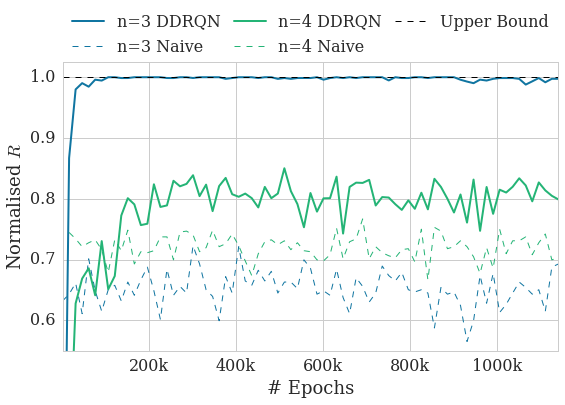

In [11]:

fig, ax = plt.subplots(figsize=(8,5))
# plt.title(r'Reward vs Information Entropy', fontsize=18)

plt.plot(x_axis, s_3_5[:,0], color=sns_colors[0], linestyle='-', linewidth=2, label="n=3 DDRQN")
plt.plot(x_axis, s_3_5_opt[:,0], color=sns_colors[0], linestyle='--', linewidth=1, label="n=3 Naive")

plt.plot(x_axis, s_3_5[:,1], color=sns_colors[1], linestyle='-', linewidth=2, label="n=4 DDRQN")
plt.plot(x_axis, s_3_5_opt[:,1], color=sns_colors[1], linestyle='--', linewidth=1, label="n=4 Naive")

# plt.plot(x_axis, s_3_5[:,2], color=sns_colors[2], linestyle='-', linewidth=3, label="DDRQN n=5")
# plt.plot(x_axis, s_3_5_opt[:,2], color=sns_colors[2], linestyle='--', linewidth=2, label="Naive n=5")

plt.plot(x_axis, np.ones(s_3_5.shape[0]), color='black', linestyle='--', linewidth=1, label="Upper Bound")



plt.ylabel(r'Normalised $R$', fontsize=18)
plt.xlabel(r'# Epochs', fontsize=18)
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: str(int(x/1000.))+'k' if x > 0 else '')) #format(int(x), ',')))
plt.xlim(x_axis[0], x_axis[-1])
plt.ylim(0.55, 1.025)
# plt.legend(borderaxespad=0.2, fontsize=18, loc=4)
plt.legend(borderaxespad=0.2, bbox_to_anchor=(0., 1.1, 1., .102), fontsize=16, ncol=3, mode="expand")
# plt.legend(borderaxespad=0.2, fontsize=18, loc=4, bbox_to_anchor=(0., 0.2, 1.38, 0))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.tight_layout()
plt.savefig('s_3_3_cur.pdf', bbox_inches='tight', dpi=200)

# Curriculum V2

In [12]:
rows = 400
s_3_4 = np.zeros((rows, 6))
s_3_4_opt = np.zeros((rows, 6))

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_9134.csv', skiprows=1, delimiter=',')
s_3_4[:,0] = data[:rows,9] / data[:rows,12]
s_3_4_opt[:,0] = data[:rows,11] / data[:rows,12]

x_axis = data[:rows,0]

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_9026.csv', skiprows=1, delimiter=',')
s_3_4[:,1] = data[:rows,9] / data[:rows,12]
s_3_4_opt[:,1] = data[:rows,11] / data[:rows,12]

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_8869.csv', skiprows=1, delimiter=',')
s_3_4[:,2] = data[:rows,9] / data[:rows,12]
s_3_4_opt[:,2] = data[:rows,11] / data[:rows,12]

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_8285.csv', skiprows=1, delimiter=',')
s_3_4[:,3] = data[:rows,9] / data[:rows,12]
s_3_4_opt[:,3] = data[:rows,11] / data[:rows,12]

# data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_7950.csv', skiprows=1, delimiter=',')
# s_3_4[:,4] = data[:rows,10] / data[:rows,12]
# s_3_4_opt[:,4] = data[:rows,11] / data[:rows,12]

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_5929.csv', skiprows=1, delimiter=',')
s_3_4[:,4] = data[:rows,9] / data[:rows,12]
s_3_4_opt[:,4] = data[:rows,11] / data[:rows,12]

# data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_5724.csv', skiprows=1, delimiter=',')
# s_3_4[:,6] = data[:rows,10] / data[:rows,12]
# s_3_4_opt[:,6] = data[:rows,11] / data[:rows,12]

# data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_5702.csv', skiprows=1, delimiter=',')
# s_3_4[:,7] = data[:rows,10] / data[:rows,12]
# s_3_4_opt[:,7] = data[:rows,11] / data[:rows,12]

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_3770.csv', skiprows=1, delimiter=',')
s_3_4[:,5] = data[:rows,9] / data[:rows,12]
s_3_4_opt[:,5] = data[:rows,11] / data[:rows,12]

In [13]:
def smooth(x,window_len=20,window='hanning'):
        if x.ndim != 1:
                raise(ValueError, "smooth only accepts 1 dimension arrays.")
        if x.size < window_len:
                raise(ValueError, "Input vector needs to be bigger than window size.")
        if window_len<3:
                return x
        if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
                raise(ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
        s=np.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
        if window == 'flat': #moving average
                w=np.ones(window_len,'d')
        else:  
                w=eval('np.'+window+'(window_len)')
        y=np.convolve(w/w.sum(),s,mode='same')
        return y[window_len:-window_len+1]

In [14]:
rows = 400
s_3_4 = np.zeros((rows, 6))
s_3_4_opt = np.zeros((rows, 6))
s_3_4_god = np.zeros((rows, 6))

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_9134.csv', skiprows=1, delimiter=',')
s_3_4[:,0] = smooth((data[:rows,9] - data[:rows,11])/(data[:rows,12]-data[:rows,11]))

x_axis = data[:rows,0]

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_9026.csv', skiprows=1, delimiter=',')
s_3_4[:,1] = smooth((data[:rows,9] - data[:rows,11])/(data[:rows,12]-data[:rows,11]))

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_8869.csv', skiprows=1, delimiter=',')
s_3_4[:,2] = smooth((data[:rows,9] - data[:rows,11])/(data[:rows,12]-data[:rows,11]))

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_8285.csv', skiprows=1, delimiter=',')
s_3_4[:,3] = smooth((data[:rows,9] - data[:rows,11])/(data[:rows,12]-data[:rows,11]))

# data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_7950.csv', skiprows=1, delimiter=',')
# s_3_4[:,4] = data[:rows,10] / data[:rows,12]
# s_3_4_opt[:,4] = data[:rows,11] / data[:rows,12]

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_5929.csv', skiprows=1, delimiter=',')
s_3_4[:,4] = smooth((data[:rows,9] - data[:rows,11])/(data[:rows,12]-data[:rows,11]))

# data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_5724.csv', skiprows=1, delimiter=',')
# s_3_4[:,6] = data[:rows,10] / data[:rows,12]
# s_3_4_opt[:,6] = data[:rows,11] / data[:rows,12]

# data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_5702.csv', skiprows=1, delimiter=',')
# s_3_4[:,7] = data[:rows,10] / data[:rows,12]
# s_3_4_opt[:,7] = data[:rows,11] / data[:rows,12]

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_3770.csv', skiprows=1, delimiter=',')
s_3_4[:,5] = smooth((data[:rows,9] - data[:rows,11])/(data[:rows,12]-data[:rows,11]))

In [44]:
rows = 560
s_3_4 = np.zeros((rows, 10))
s_3_4_opt = np.zeros((rows, 10))
s_3_4_god = np.zeros((rows, 10))

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_3770.csv', skiprows=1, delimiter=',')
s_3_4[:,0] = smooth((data[:rows,9])/(data[:rows,12]))
s_3_4_opt[:,0] = data[:rows,11]/(data[:rows,12])

x_axis = data[:rows,0]

# data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_4159.csv', skiprows=1, delimiter=',')
# s_3_4[:,1] = smooth((data[:rows,9])/(data[:rows,12]))
# s_3_4_opt[:,1] = data[:rows,11]/(data[:rows,12])

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_8869.csv', skiprows=1, delimiter=',')
s_3_4[:,1] = smooth((data[:rows,9])/(data[:rows,12]))
s_3_4_opt[:,1] = data[:rows,11]/(data[:rows,12])

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_5702.csv', skiprows=1, delimiter=',')
s_3_4[:,2] = smooth((data[:rows,9])/(data[:rows,12]))
s_3_4_opt[:,2] = data[:rows,11]/(data[:rows,12])

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_5724.csv', skiprows=1, delimiter=',')
s_3_4[:,3] = smooth((data[:rows,9])/(data[:rows,12]))
s_3_4_opt[:,3] = data[:rows,11]/(data[:rows,12])

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_5929.csv', skiprows=1, delimiter=',')
s_3_4[:,4] =  smooth((data[:rows,9])/(data[:rows,12]))
s_3_4_opt[:,4] = data[:rows,11] / data[:rows,12]

# data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_6020.csv', skiprows=1, delimiter=',')
# s_3_4[:,4] = smooth((data[:rows,9])/(data[:rows,12]))
# s_3_4_opt[:,4] = data[:rows,11]/(data[:rows,12])

# data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_6683.csv', skiprows=1, delimiter=',')
# s_3_4[:,5] = data[:rows,9] / data[:rows,12]
# s_3_4_opt[:,5] = data[:rows,11] / data[:rows,12]

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_7950.csv', skiprows=1, delimiter=',')
s_3_4[:,5] =  smooth((data[:rows,9])/(data[:rows,12]))
s_3_4_opt[:,5] = data[:rows,11] / data[:rows,12]

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_8285.csv', skiprows=1, delimiter=',')
s_3_4[:,6] = smooth((data[:rows,9])/(data[:rows,12]))
s_3_4_opt[:,6] = data[:rows,11]/(data[:rows,12])

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_8869.csv', skiprows=1, delimiter=',')
s_3_4[:,7] = smooth((data[:rows,9])/(data[:rows,12]))
s_3_4_opt[:,7] = data[:rows,11]/(data[:rows,12])

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_9026.csv', skiprows=1, delimiter=',')
s_3_4[:,8] = smooth((data[:rows,9])/(data[:rows,12]))
s_3_4_opt[:,8] = data[:rows,11]/(data[:rows,12])

data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_9134.csv', skiprows=1, delimiter=',')
s_3_4[:,9] = smooth((data[:rows,9])/(data[:rows,12]))
s_3_4_opt[:,9] = data[:rows,11]/(data[:rows,12])

# data = np.loadtxt('s_3_4/switch_128_3_4_shared_feed_smart_9612.csv', skiprows=1, delimiter=',')
# s_3_4[:,5] = smooth((data[:rows,9])/(data[:rows,12]))
# s_3_4_opt[:,5] = data[:rows,11]/(data[:rows,12])

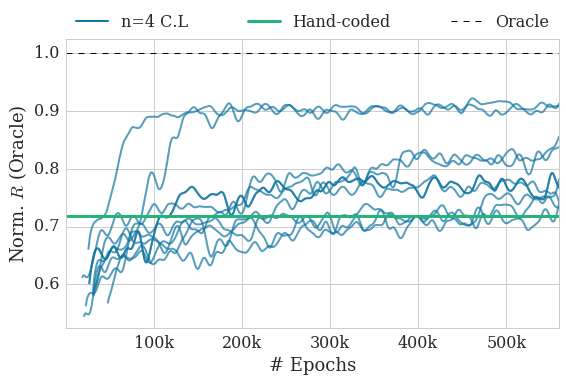

In [45]:
fig, ax = plt.subplots(figsize=(8,5))
# plt.title(r'Reward vs Information Entropy', fontsize=18)

s_3_4_m, s_3_4_c = mean_confidence_interval(s_3_4)
plt.plot(x_axis, s_3_4, color=sns_colors[0], linestyle='-', linewidth=2, alpha=0.7)
plt.plot([0], [0], color=sns_colors[0], linestyle='-', linewidth=2, label="n=4 C.L", alpha=1)
# plt.fill_between(x_axis, s_3_4_m - s_3_4_c, s_3_4_m + s_3_4_c, facecolor=sns_colors[0], edgecolor="none", alpha=0.1)

plt.plot(x_axis, np.ones(s_3_4.shape[0])*np.nanmean(s_3_4_opt), color=sns_colors[1], linestyle='-', linewidth=3, label="Hand-coded")

plt.plot(x_axis, np.ones(s_3_4.shape[0]), color='black', linestyle='--', linewidth=1, label="Oracle")



plt.ylabel(r'Norm. $R$ (Oracle)', fontsize=18)
plt.xlabel(r'# Epochs', fontsize=18)
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: str(int(x/1000.))+'k' if x > 0 else '')) #format(int(x), ',')))
plt.xlim(x_axis[0], x_axis[-1])
plt.ylim(0.525, 1.025)
# plt.legend(borderaxespad=0.2, fontsize=18, loc=4)
plt.legend(borderaxespad=0.2, bbox_to_anchor=(0., 1.02, 1., .102), fontsize=16, ncol=3, mode="expand")
# plt.legend(borderaxespad=0.2, fontsize=18, loc=4, bbox_to_anchor=(0., 0.2, 1.38, 0))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.tight_layout()
plt.savefig('s_3_3_cur.pdf', bbox_inches='tight', dpi=200)

In [98]:
for i in range(6):
    print(i, s_3_4[-1,i])

0 -0.0313901345291
1 0.688
2 0.162561576355
3 0.287878787879
4 0.0
5 -0.0917431192661
